# Make Database for `mom6-panan` Experiments

This notebook makes the `cosima-cookbook` database for all current `mom6-panan` experiments.

Also plots a few key spinup and stability diagnostics, and displays available variables in the `DatabaseExplorer` widget.

In [1]:
import cosima_cookbook as cc
import matplotlib.pyplot as plt

## Define and update database

In [2]:
# USing master database
#db='/g/data/ik11/outputs/mom6-panan/panant.db'
session=cc.database.create_session()

In [3]:
expts = ['panant-v2','panant-hycom1','panant-01-zstar','panant-01-hycom1','panant-01-hycom1-v2','panant-01-hycom1-v3','panant-01-hycom1-v4','panant-01-hycom1-v5','panant-01-hycom1-v6']
archive_dir = '/g/data/ik11/outputs/mom6-panan/'

## Widget to check variable names

In [3]:
dbx = cc.explore.DatabaseExplorer(session=session)
dbx

DatabaseExplorer(children=(HTML(value='<style>.header p{ line-height: 1.4; margin-bottom: 10px }</style>\n    …

## Looking at KE, for spinup

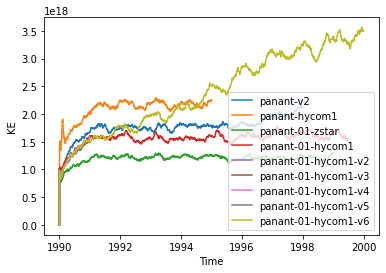

In [4]:
for expt in expts:
    darray = cc.querying.getvar(expt,'KE', session,ncfile='ocean.stats.nc',decode_times=False)
    darray.coords['Time'] = darray.coords['Time']/365
    darray.sum('Layer').plot(label=expt)
plt.legend()

## Checking CFL

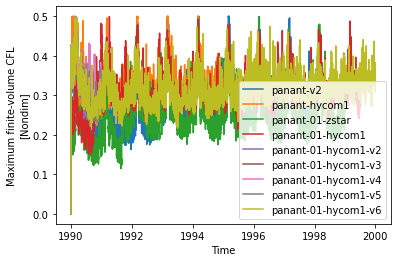

In [5]:
for expt in expts:
    darray = cc.querying.getvar(expt,'max_CFL_trans', session,ncfile='ocean.stats.nc',decode_times=False)
    darray.coords['Time'] = darray.coords['Time']/365
    darray.plot(label=expt)
plt.legend()

# Checking Truncations

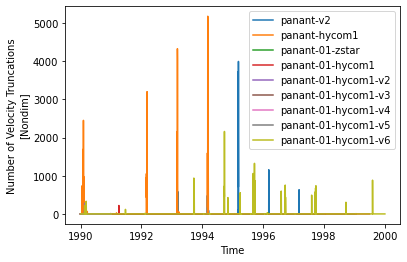

In [6]:
for expt in expts:
    darray = cc.querying.getvar(expt,'Ntrunc', session,ncfile='ocean.stats.nc',decode_times=False)
    darray.coords['Time'] = darray.coords['Time']/365
    darray.plot(label=expt)
plt.legend()

## Checking FW runoff

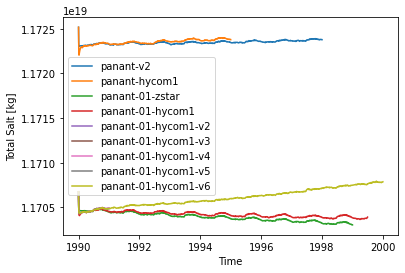

In [7]:
for expt in expts:
    darray = cc.querying.getvar(expt,'Salt', session,ncfile='ocean.stats.nc',decode_times=False)
    darray.coords['Time'] = darray.coords['Time']/365
    darray.plot(label=expt)
plt.legend()